<a href="https://colab.research.google.com/github/upparasudharani/DN/blob/main/RF_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore")
df = pd.read_excel("/content/dataset_DN.xlsx")
df.head()


,ID,Age,Gender,BU,SCr,HbA1c,Class,eGFR,Stages,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,50,male,30.71,1.02,6.90,non-DN,99.586405,Stage I,NaN,NaN,NaN
1,2,62,male,31.01,1.26,6.60,DN,74.702037,Stage II,NaN,NaN,NaN
2,3,65,female,27.11,0.81,7.50,non-DN,75.422987,Stage II,NaN,NaN,NaN
3,4,74,male,26.51,6.98,8.50,DN,9.994300,Stage V,NaN,NaN,NaN
4,5,40,male,39.88,1.16,10.56,non-DN,89.828235,Stage II,NaN,NaN,NaN


In [137]:

df.insert(5,"level",value=True)

In [138]:
for i in range(0,len(df['eGFR'])):
  if df.eGFR[i]>90:
    df.level[i]=1
  elif df.eGFR[i]>=60 and df.eGFR[i]<=90 :
    df.level[i]=2
  elif df.eGFR[i]>=30 and df.eGFR[i]<60 :
    df.level[i]=3
  elif df.eGFR[i]>=15 and df.eGFR[i]<30 :
    df.level[i]=4
  elif df.eGFR[i]<15:
    df.level[i]=5
df['level']=df['level'].astype(int)

In [139]:
#Replace categorical values with numbers
df['Gender'].value_counts()
categories = {"male":0, "female":1}
df['Gender']=df['Gender'].factorize()[0].astype('float')
df['Gender'] = df['Gender'].replace(categories)
df['Class'].value_counts()

categories = {"DN":0, "non-DN":1}
df['Class']=df['Class'].factorize()[0].astype(float)
df['Class'] = df['Class'].replace(categories)

In [140]:

#Replace categorical values with numbers
df.describe()
df.info() 
df['ID'].fillna(df['ID'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].median(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['BU'].fillna(df['BU'].median(), inplace=True)
df['SCr'].fillna(df['SCr'].median(), inplace=True)
df['HbA1c'].fillna(df['HbA1c'].median(), inplace=True)
df['Class'].fillna(df['Class'].median(), inplace=True)
df['eGFR'].fillna(df['eGFR'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           519 non-null    int64  
 1   Age          519 non-null    int64  
 2   Gender       519 non-null    float64
 3   BU           508 non-null    float64
 4   SCr          519 non-null    float64
 5   level        519 non-null    int64  
 6   HbA1c        504 non-null    float64
 7   Class        519 non-null    float64
 8   eGFR         519 non-null    float64
 9   Stages       519 non-null    object 
 10  Unnamed: 9   0 non-null      float64
 11  Unnamed: 10  0 non-null      float64
 12  Unnamed: 11  1 non-null      object 
dtypes: float64(8), int64(3), object(2)
memory usage: 52.8+ KB


In [141]:
df.head()

,ID,Age,Gender,BU,SCr,level,HbA1c,Class,eGFR,Stages,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,50,0.0,30.71,1.02,1,6.90,0.0,99.586405,Stage I,NaN,NaN,NaN
1,2,62,0.0,31.01,1.26,2,6.60,1.0,74.702037,Stage II,NaN,NaN,NaN
2,3,65,1.0,27.11,0.81,2,7.50,0.0,75.422987,Stage II,NaN,NaN,NaN
3,4,74,0.0,26.51,6.98,5,8.50,1.0,9.994300,Stage V,NaN,NaN,NaN
4,5,40,0.0,39.88,1.16,2,10.56,0.0,89.828235,Stage II,NaN,NaN,NaN


ID               0
Age              0
Gender           0
BU               0
SCr              0
level            0
HbA1c            0
Class            0
eGFR             0
Stages           0
Unnamed: 9     519
Unnamed: 10    519
Unnamed: 11    518
dtype: int64
53.37030828516378
6.866743737957611
69.50957661402123
ID               0
Age              0
Gender           0
BU               0
SCr              0
level            0
HbA1c            0
Class            0
eGFR             0
Stages           0
Unnamed: 9     519
Unnamed: 10    519
Unnamed: 11    518
dtype: int64
ID               int64
Age              int64
Gender         float64
BU             float64
SCr            float64
level            int64
HbA1c          float64
Class          float64
eGFR           float64
Stages          object
Unnamed: 9     float64
Unnamed: 10    float64
Unnamed: 11     object
dtype: object


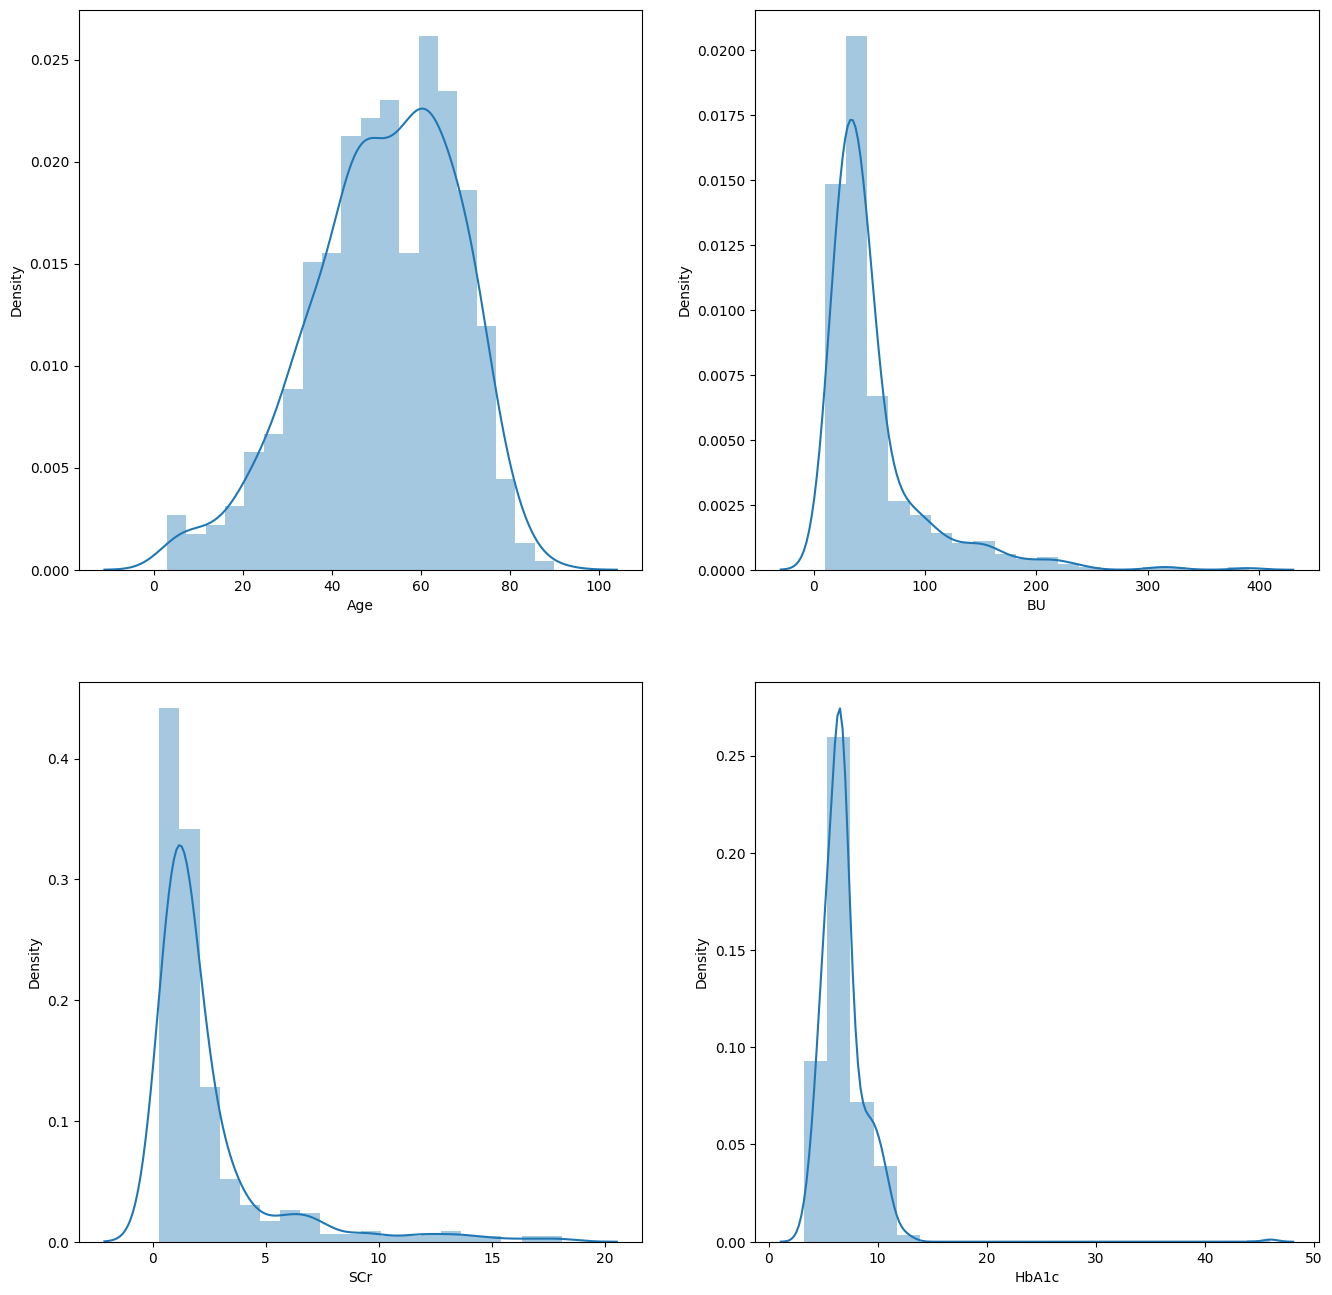

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(16,16))

sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.BU, bins = 20, ax=ax[0,1]) 
sns.distplot(df.SCr, bins = 20, ax=ax[1,0]) 
sns.distplot(df.HbA1c, bins = 20, ax=ax[1,1]) 


df.describe()
df_copy = df.copy(deep=True)
df_copy[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR', 'Stages']] = df_copy[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR', 'Stages']].replace(0,np.NaN)

print(df.isnull().sum())
#df = df.dropna()

print(df['BU'].mean())
df['BU'] = df['BU'].fillna(53.68)
print(df['HbA1c'].mean())
df['HbA1c'] = df['HbA1c'].fillna(6.87)
print(df['eGFR'].mean())
df['eGFR'] = df['eGFR'].fillna(69.50)
print(df.isnull().sum())

#Rename Dataset to Label to make it easy to understand

print(df.dtypes)

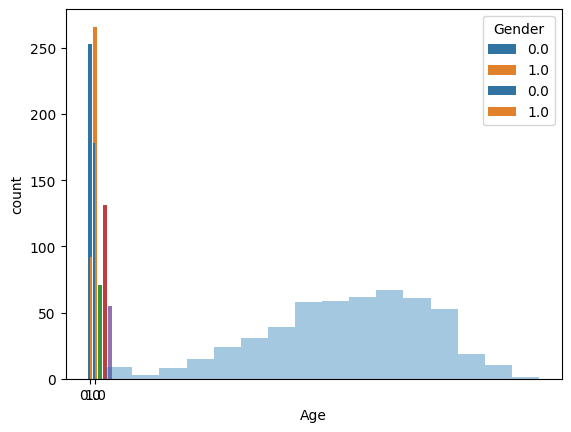

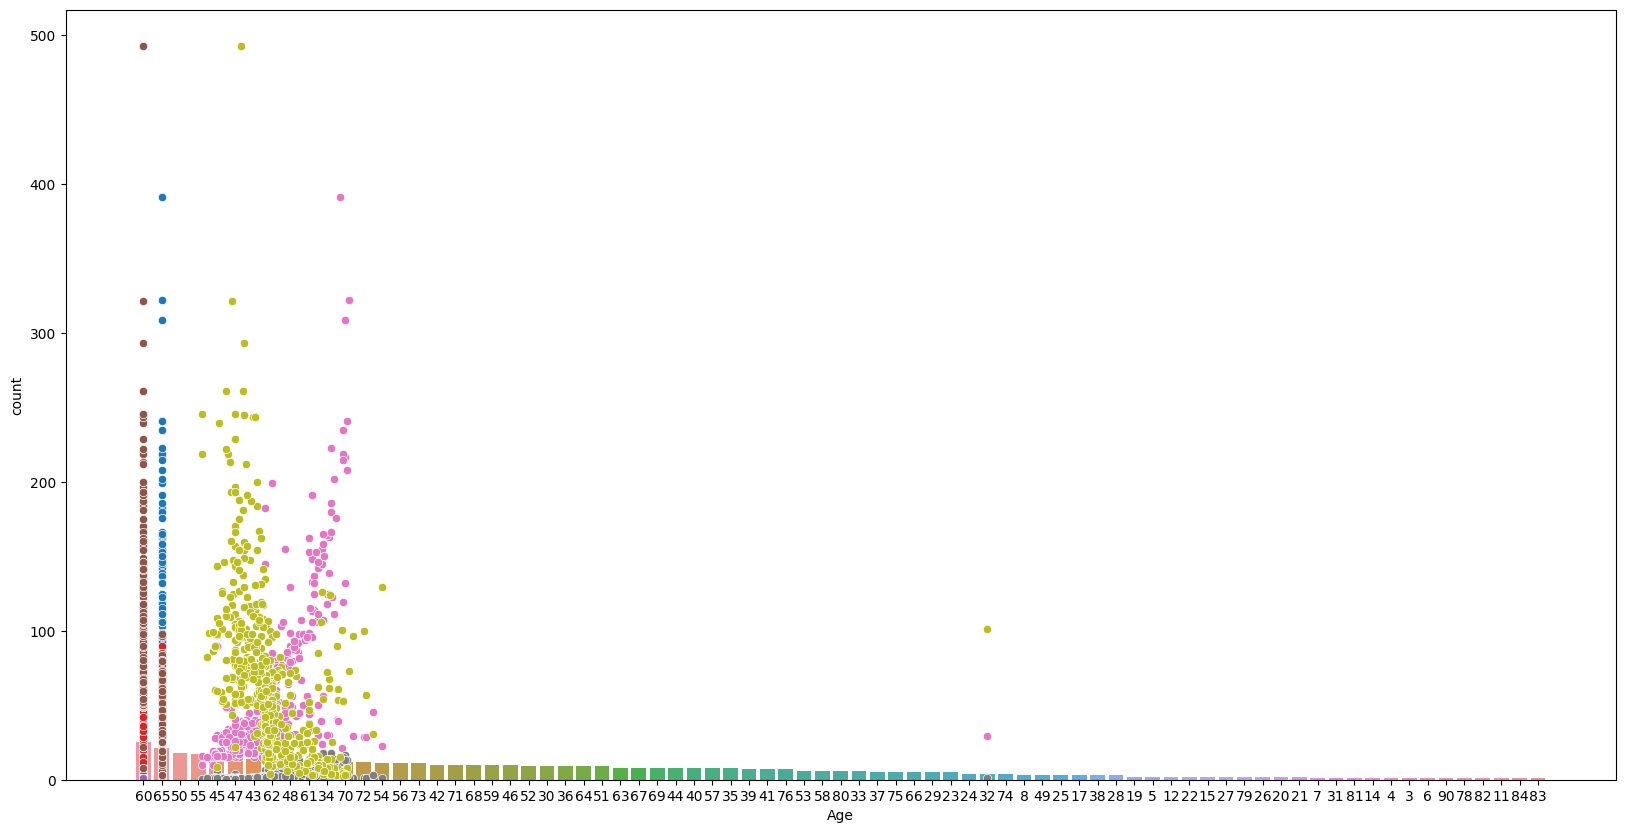

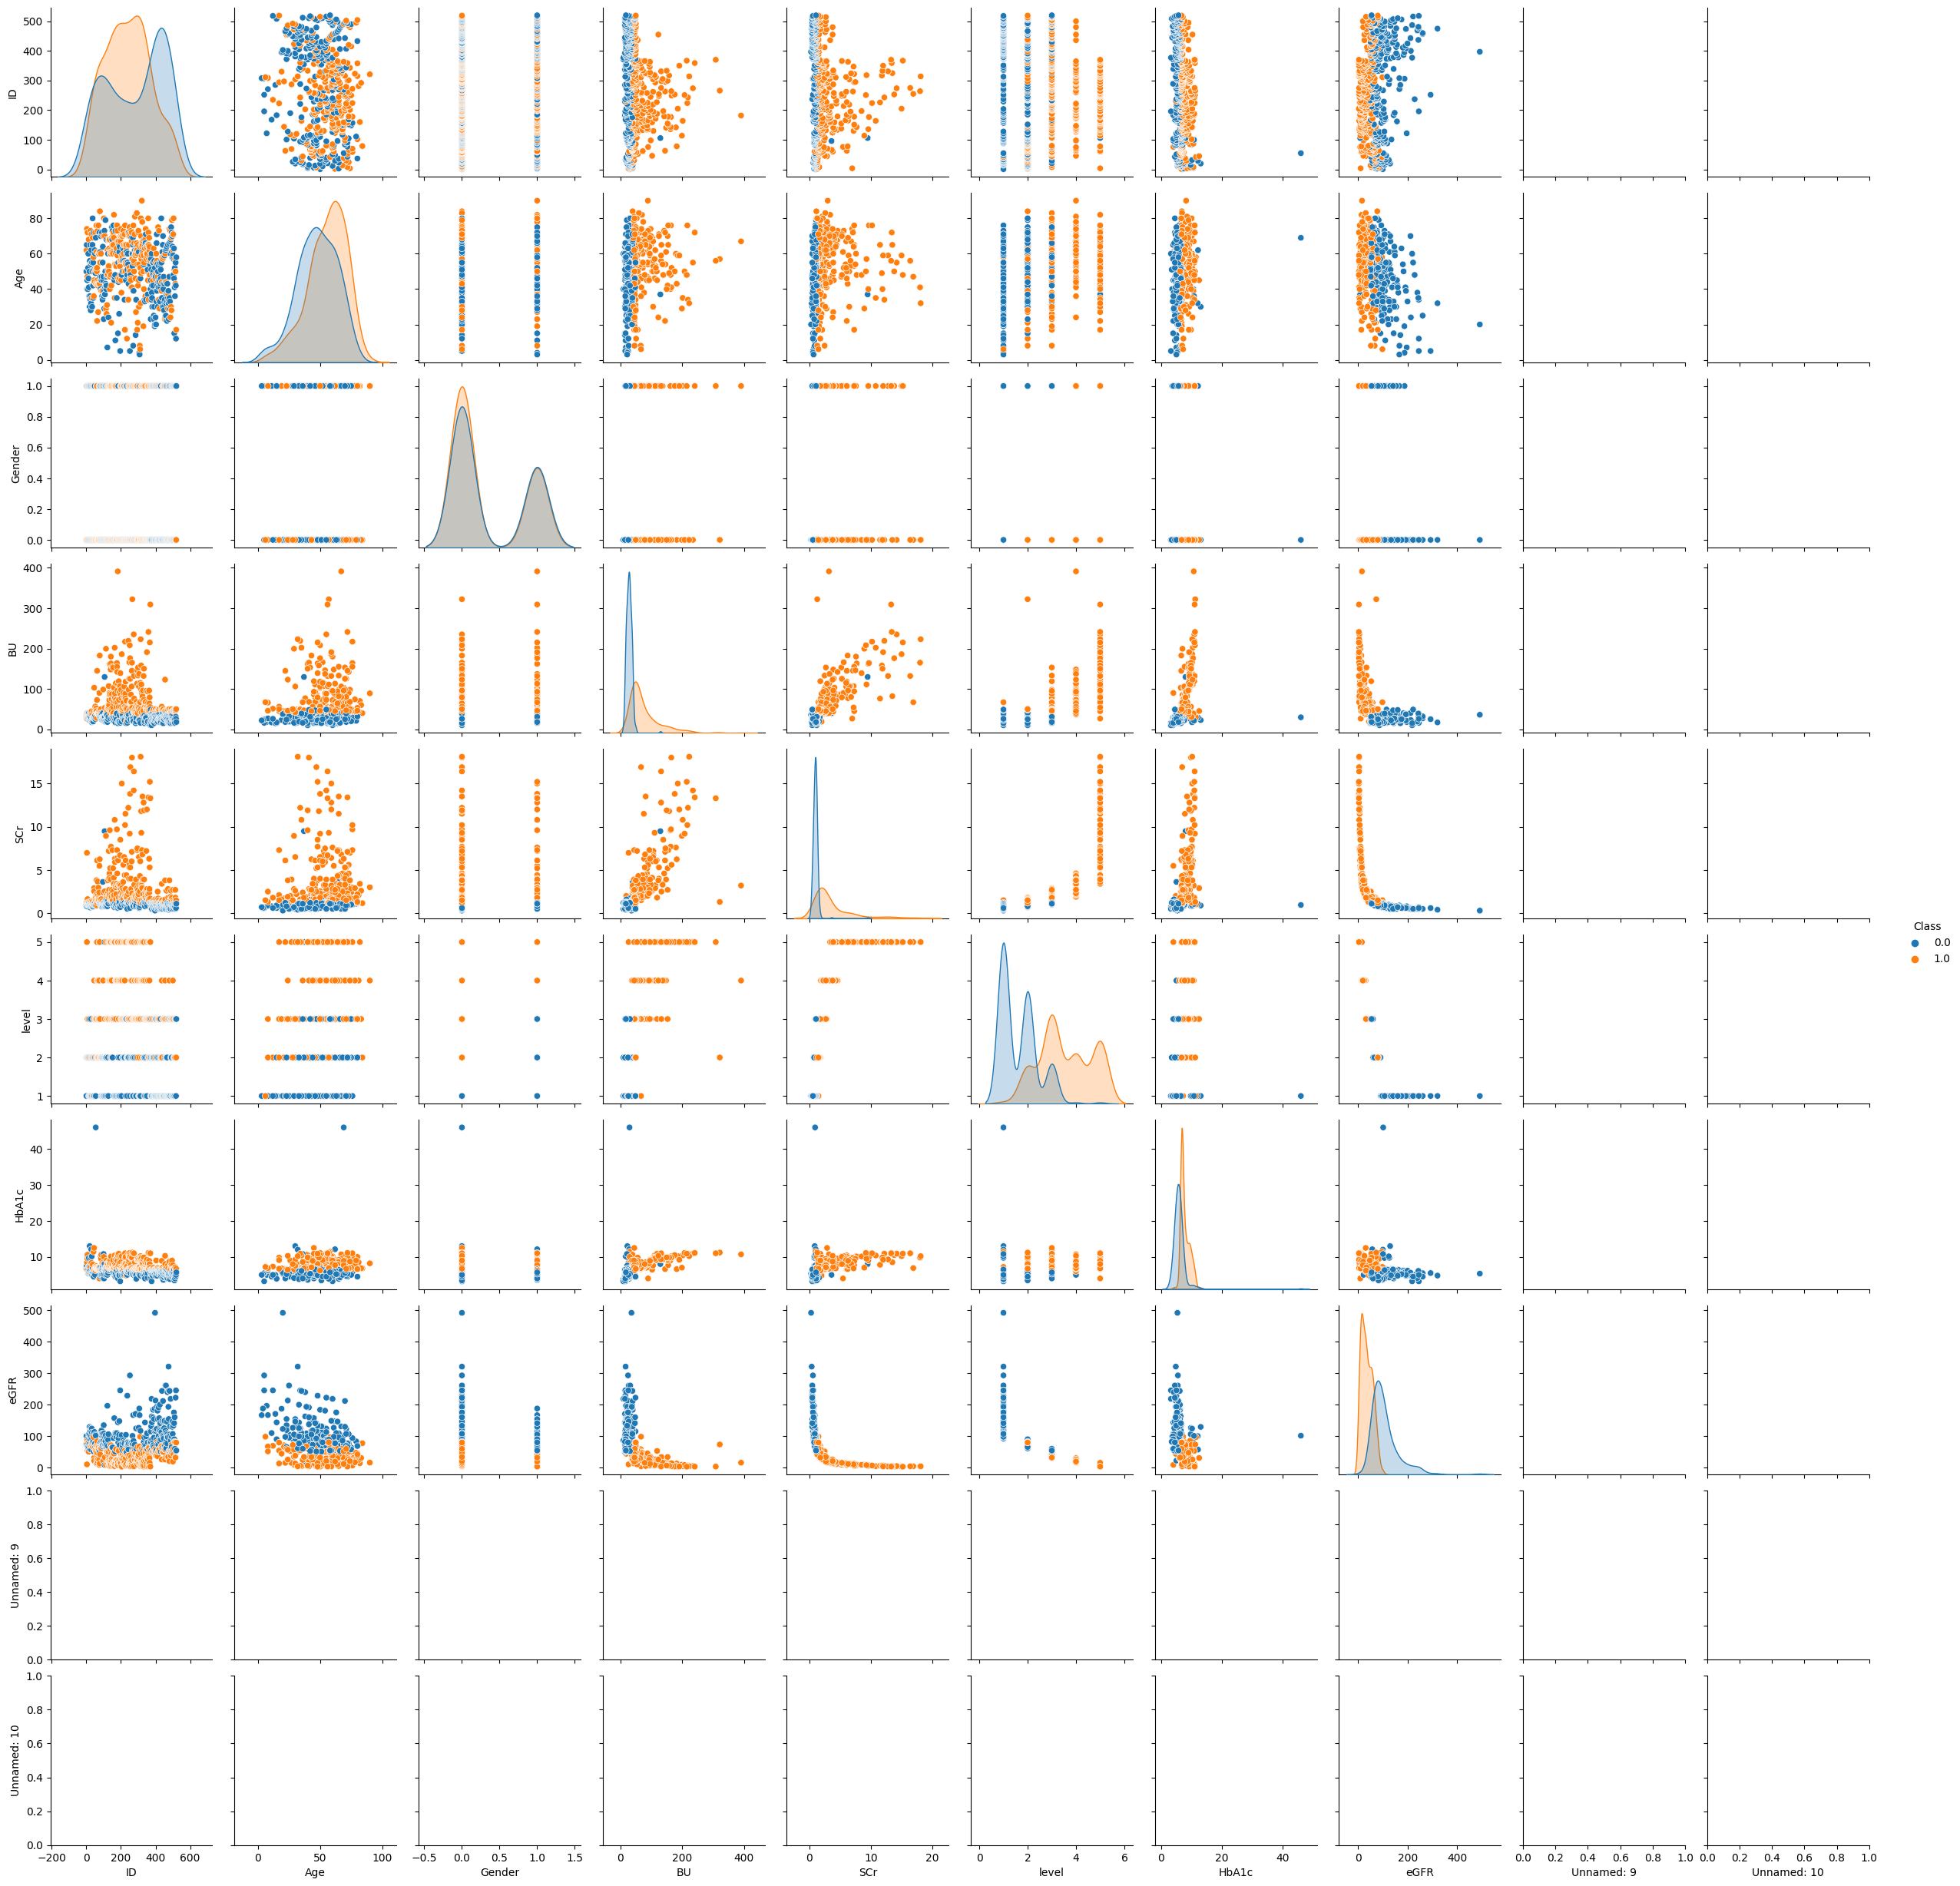

In [ ]:
df.corr()
#Understand the data - # Value 1 = Liver disease and 2 is no disease
sns.countplot(x="Class", data=df)
sns.countplot(x="Class", hue="Gender", data=df)
sns.countplot(x="Stages", data=df)
sns.countplot(x="Class", hue="Gender", data=df)
sns.distplot(df['Age'], kde=False)

plt.figure(figsize=(20,10)) 
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)


sns.scatterplot(x="Class", y="BU", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="Class", y="HbA1c", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="Class", y="SCr", data=df) 
sns.scatterplot(x="Class", y="Age", data=df) 
sns.scatterplot(x="Class", y="Gender", data=df)
sns.scatterplot(x="Class", y="eGFR", data=df) 
sns.scatterplot(x="HbA1c", y="BU", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="HbA1c", y="SCr", data=df) 
sns.scatterplot(x="HbA1c", y="eGFR", data=df)
sns.pairplot(df, hue='Class')

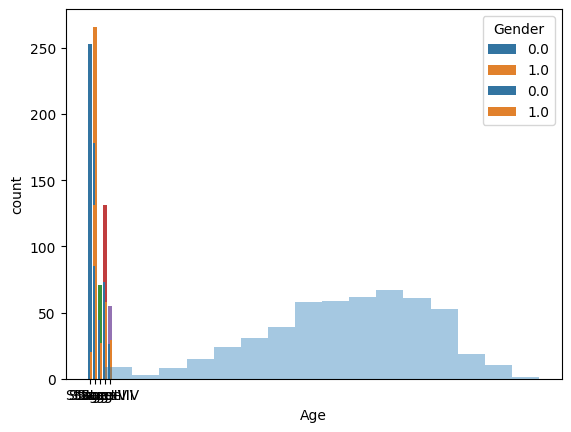

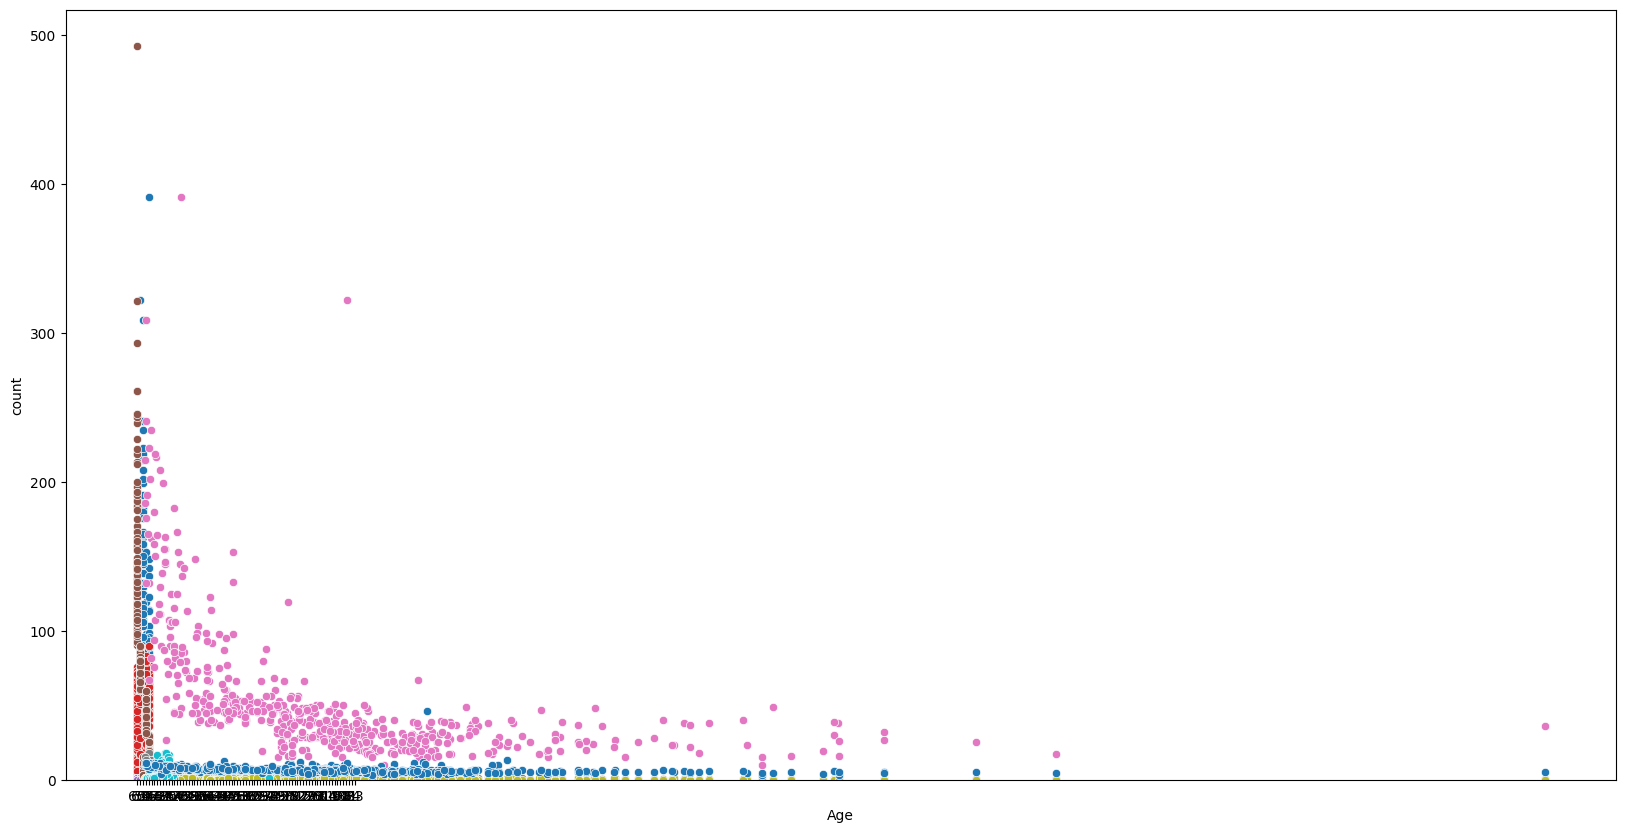

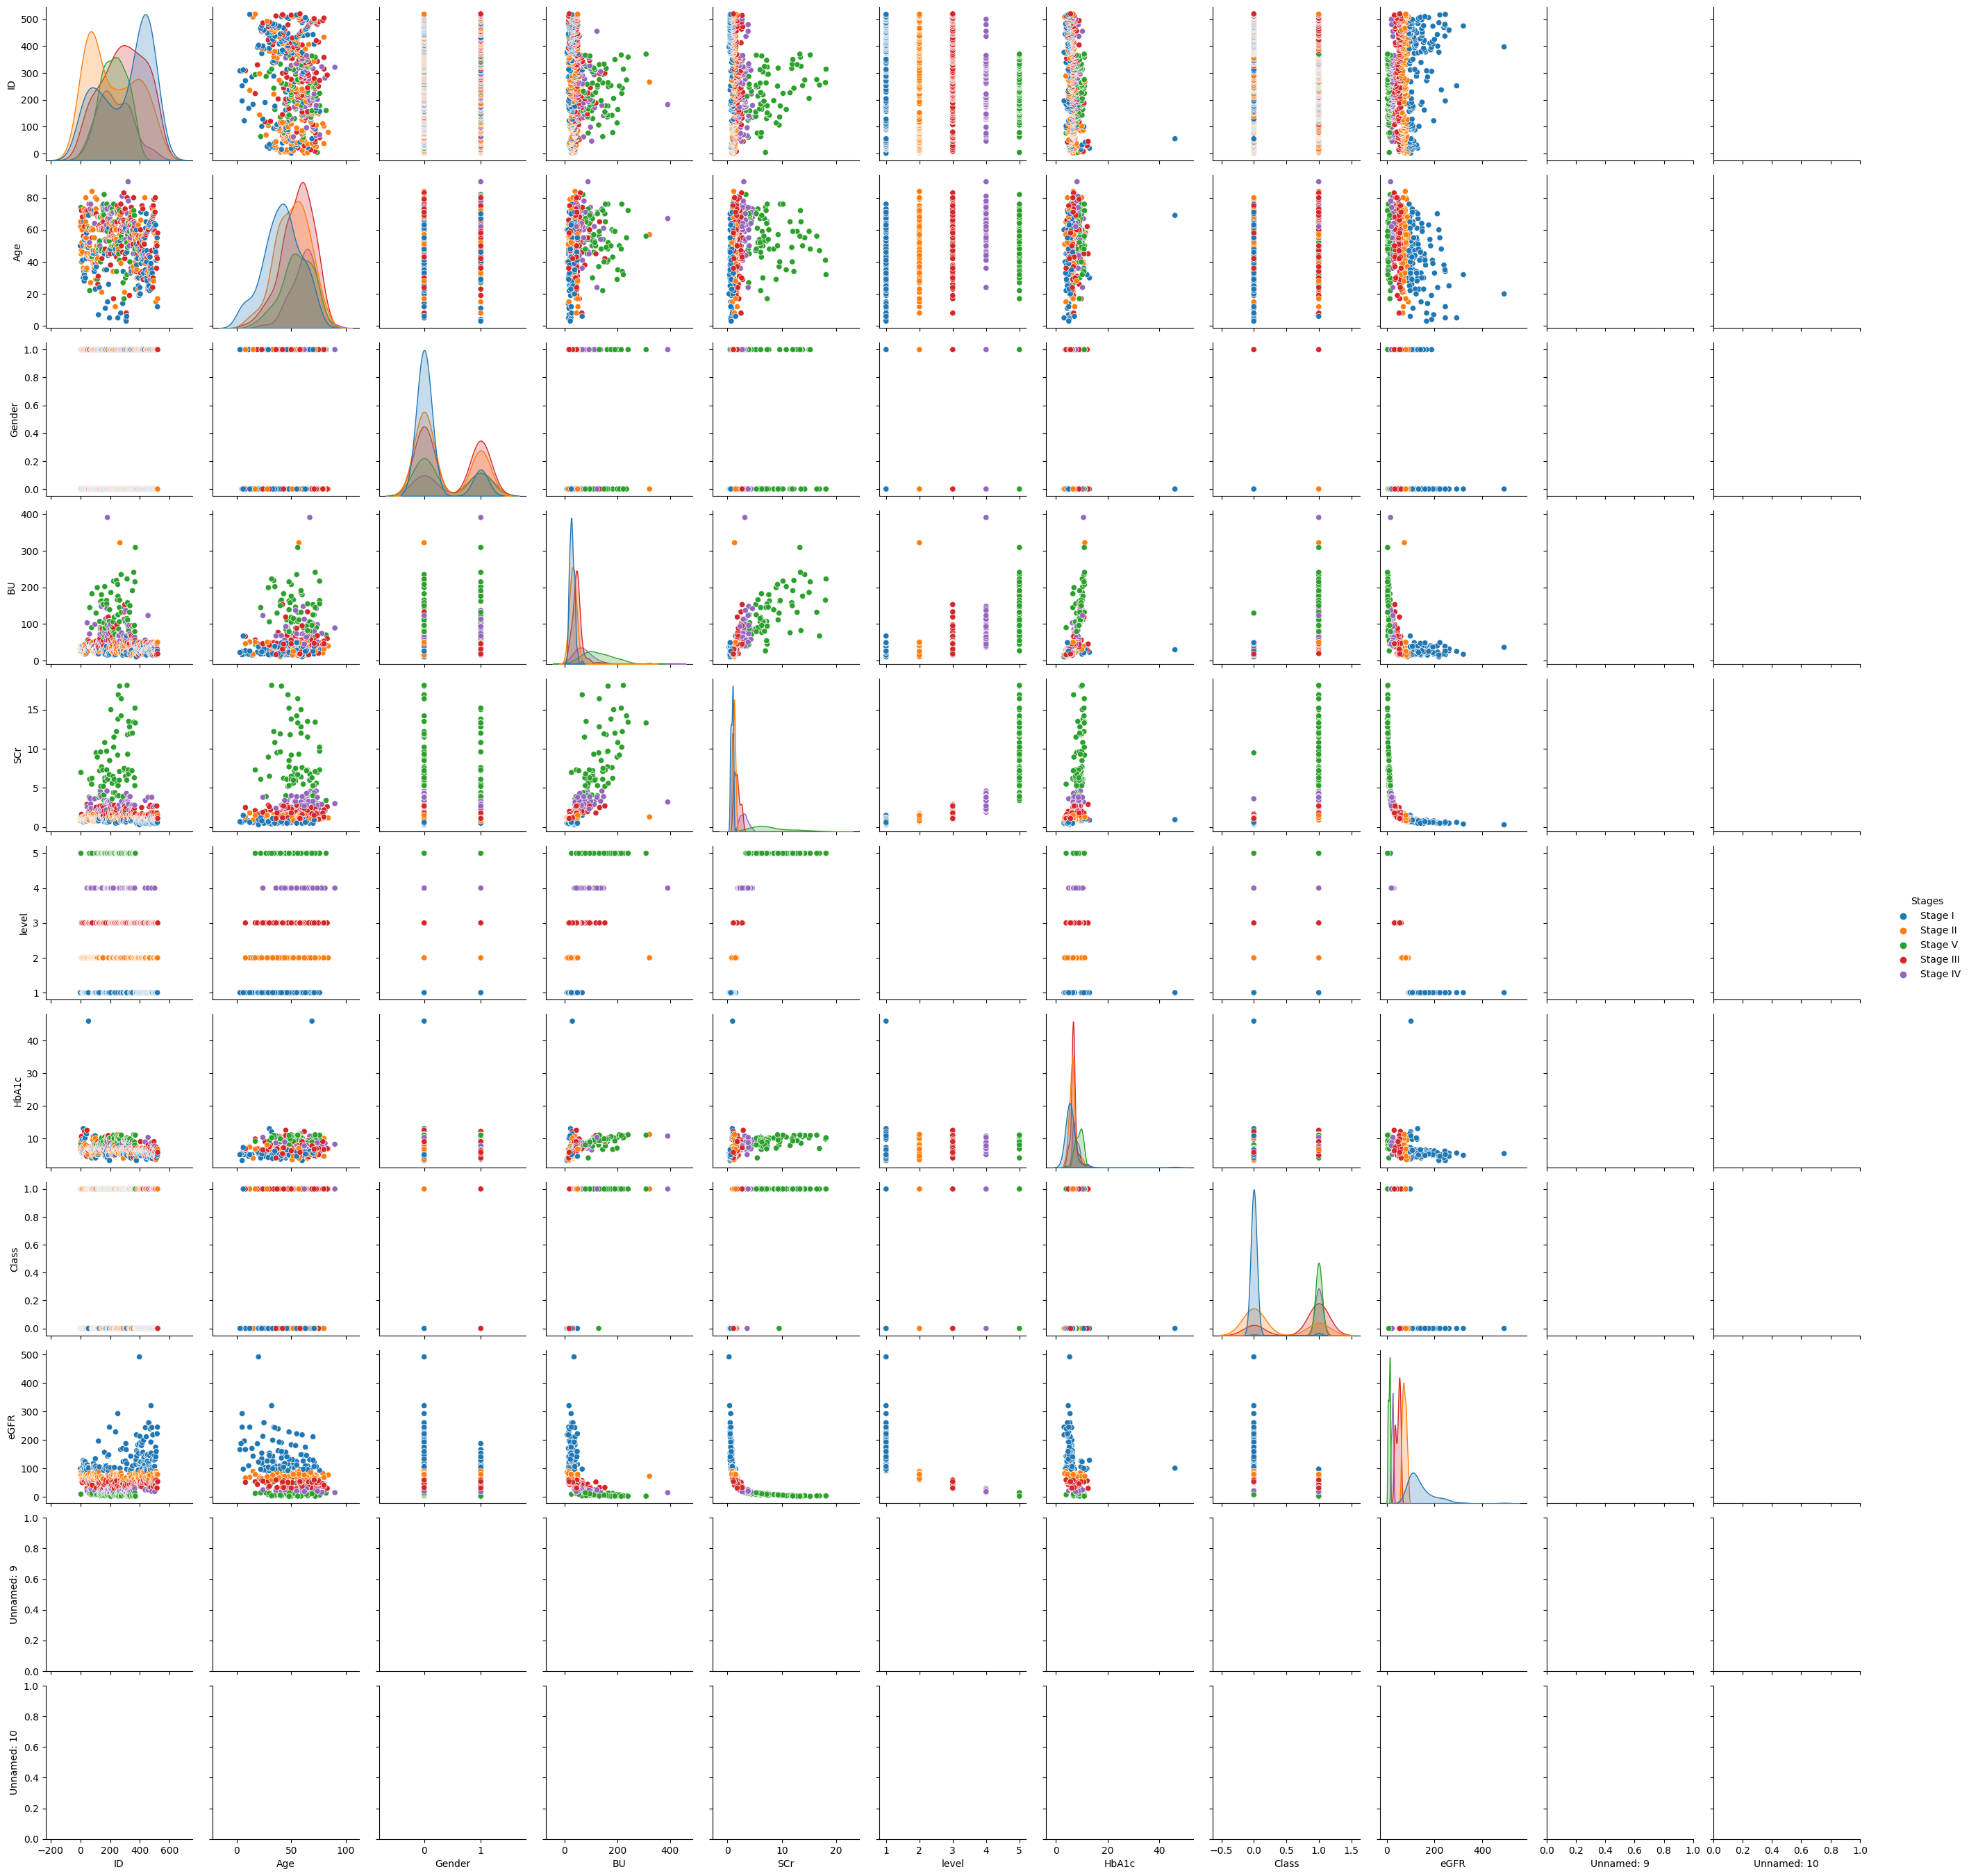

In [ ]:
df.corr()
#Understand the data - # Value 1 = Liver disease and 2 is no disease
sns.countplot(x="Class", data=df)
sns.countplot(x="Class", hue="Gender", data=df)
sns.countplot(x="Stages", data=df)
sns.countplot(x="Stages", hue="Gender", data=df)
sns.distplot(df['Age'], kde=False)

plt.figure(figsize=(20,10)) 
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)


sns.scatterplot(x="Stages", y="BU", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="Stages", y="HbA1c", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="Stages", y="SCr", data=df) 
sns.scatterplot(x="Stages", y="Age", data=df) 
sns.scatterplot(x="Stages", y="Gender", data=df)
sns.scatterplot(x="Stages", y="eGFR", data=df) 
sns.scatterplot(x="eGFR", y="BU", data=df)  #Seems no trend between labels 1 and 2
sns.scatterplot(x="eGFR", y="SCr", data=df)
sns.scatterplot(x="eGFR", y="Gender", data=df)
sns.scatterplot(x="HbA1c", y="SCr", data=df) 
sns.scatterplot(y="HbA1c", x="eGFR", data=df)
sns.pairplot(df, hue='Stages')

In [142]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["level"].values
df.info()
df["level"]
#Encode labels
#This is required by scikit learn when dealing with categorical data.

#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(Y)
y=label_encoder.transform(Y)
classes=label_encoder.classes_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           519 non-null    int64  
 1   Age          519 non-null    int64  
 2   Gender       519 non-null    float64
 3   BU           519 non-null    float64
 4   SCr          519 non-null    float64
 5   level        519 non-null    int64  
 6   HbA1c        519 non-null    float64
 7   Class        519 non-null    float64
 8   eGFR         519 non-null    float64
 9   Stages       519 non-null    object 
 10  Unnamed: 9   0 non-null      float64
 11  Unnamed: 10  0 non-null      float64
 12  Unnamed: 11  1 non-null      object 
dtypes: float64(8), int64(3), object(2)
memory usage: 52.8+ KB


In [143]:
X = df[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR']]
y = df['level']
cols = X.columns
index = X.index
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR']], df['level'], test_size=0.20, random_state=0)
     
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [144]:
#Classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_pred,y_test)

confusion_matrix(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.96      1.00      0.98        26
           3       1.00      0.90      0.95        30
           4       0.87      1.00      0.93        13
           5       1.00      1.00      1.00        14

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



In [146]:
ID=input("ID")
Age=input("age")
Gender=input("Gender")
BU=input("Blood urea")
SCr=input("Serum Creatinine")
HbA1C=input("Blood sugar")
Class=input("Class")
eGFR=input("eGFR")
prediction = RF.predict([[ID, Age,Gender, BU, SCr,HbA1C,Class,eGFR]])
prediction

ID5
age45
Gender0
Blood urea25
Serum Creatinine1
Blood sugar5
Class1
eGFR105


array([1])

In [147]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()



In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
  

In [149]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()



df_model

,Accuracy
Logistic Regression,0.817308
Support Vector Machines,0.519231
Decision Trees,0.990385
Random Forest,0.980769
Naive Bayes,0.951923
K-Nearest Neighbor,0.778846


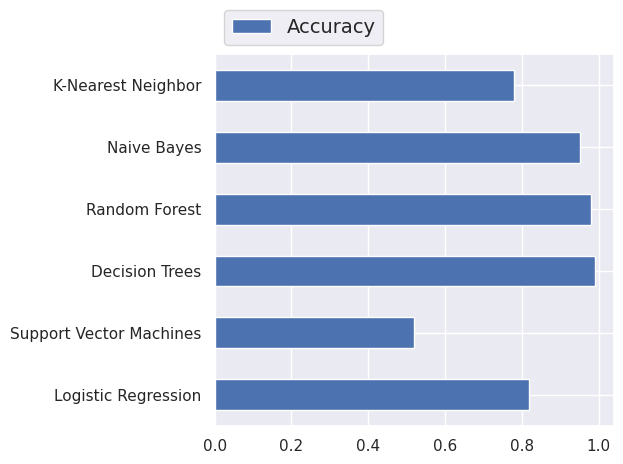

In [150]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

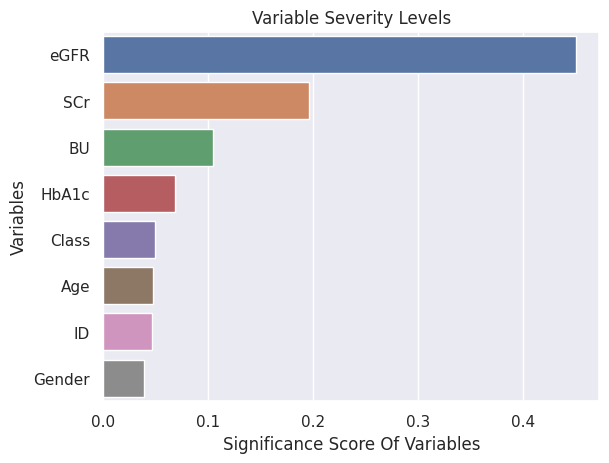

In [151]:
from sklearn.ensemble import RandomForestClassifier
     

model = RandomForestClassifier()
model.fit(X_train,y_train)

cross_val_score(model, X, y, cv = 10).mean()

feature_imp = pd.Series(model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


In [152]:
y_pred = model.predict(X_test)
y_pred


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, roc_auc_score
accuracy_score(y_pred,y_test)


0.9711538461538461

In [153]:
confusion_matrix(y_pred,y_test)

array([[21,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0],
       [ 0,  0, 27,  3,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 14]])

In [154]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        27
           3       1.00      0.90      0.95        30
           4       0.80      1.00      0.89        12
           5       1.00      1.00      1.00        14

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.98      0.97      0.97       104



In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [156]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
#%matplotlib inline


y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(y, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=50,
                             max_depth=3,
                             random_state=0))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

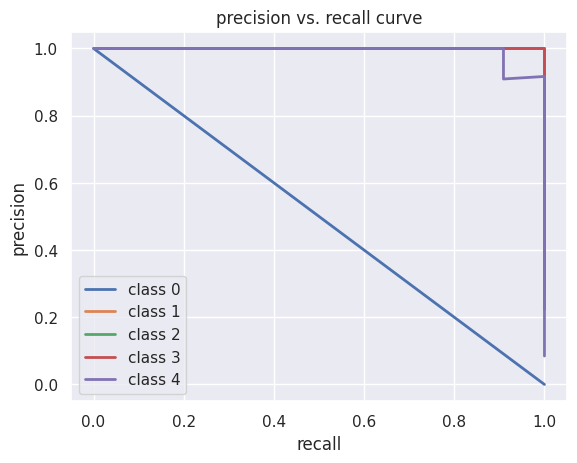

In [159]:


# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

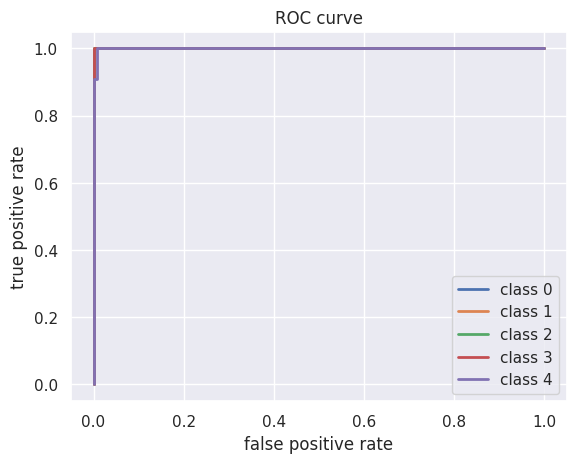

In [160]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()